<a href="https://colab.research.google.com/github/lauraceciliadiazdavila/IA-2023/blob/main/09_MLP/MLP_IA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

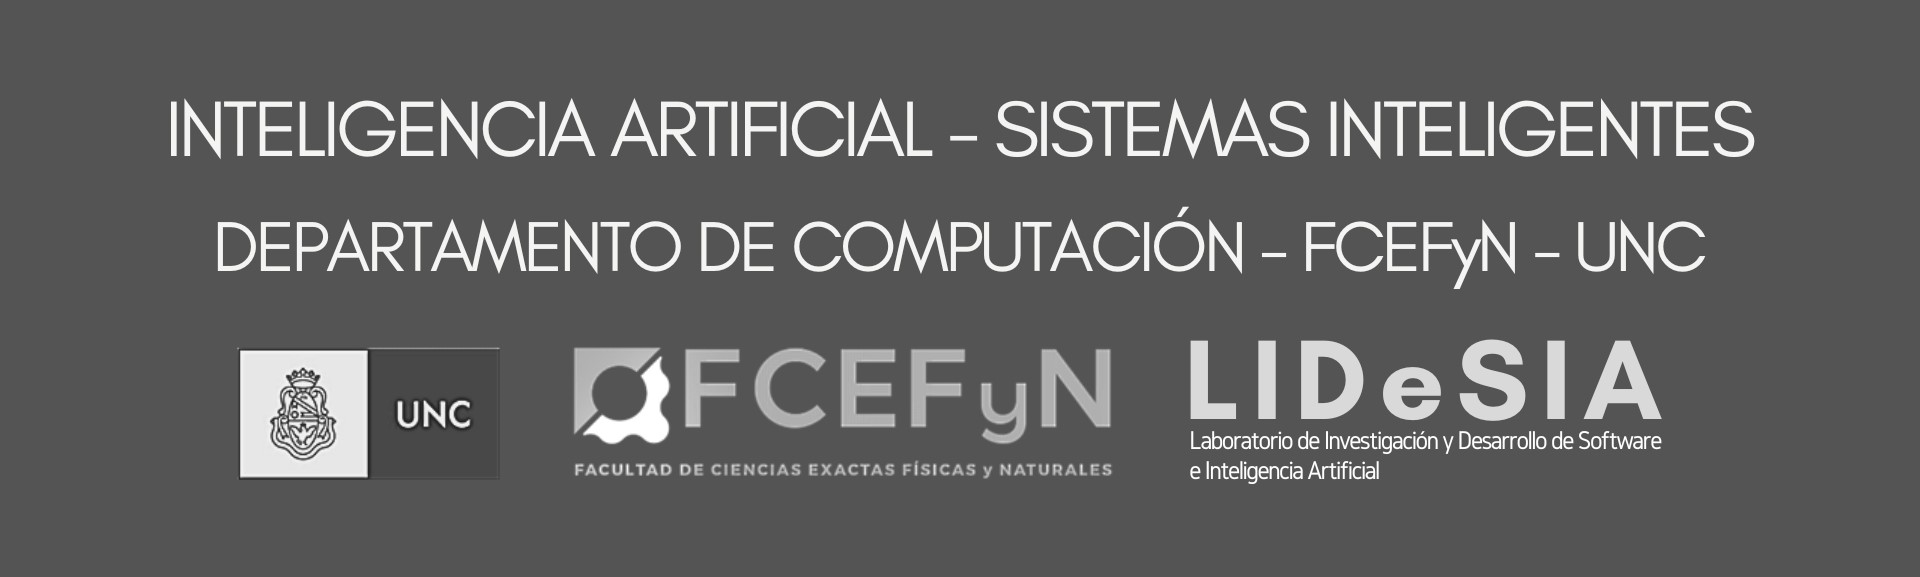

# MLP
---


FCEFyN - UNC - Cátedra de Inteligencia Artificial

---

*   Autor/es: Ing. Facundo Nieto (LIDeSIA - FCEFyN)

*   Directora: Dra. Laura Cecilia Diaz Davila (LIDeSIA - FCEFyN)

---



# **MLP en TensorFlow!**

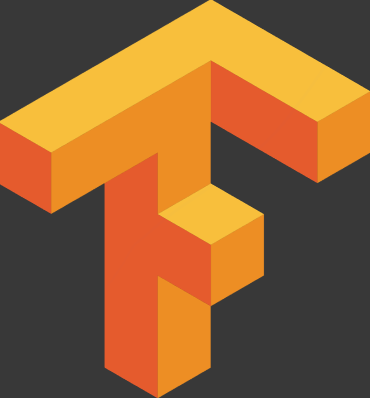





In [ ]:
#importar librerias
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from skimage import io
from google.colab.patches import cv2_imshow
import cv2
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.layers import Flatten, Dense
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from keras.optimizers import Adam

plt.style.use('dark_background')

# 1. Ejemplo Iris

## 1.1 Cargar Dataset

In [ ]:
# Importamos el csv
# df_iris = pd.read_csv('iris.csv')
df_iris = pd.read_csv("https://raw.githubusercontent.com/FacuNieto/MLP_IA_FCEFyN/main/iris.csv")

In [ ]:
# Veamos el Dataframe
df_iris

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


## 1.2 Encoding

In [ ]:
# Crear un diccionario que mapea cada etiqueta categórica de la columna "target" a su valor codificado correspondiente.
diccionario_aux = {'setosa': 0, 'versicolor': 1, 'virginica': 2}

# Inicializar una lista vacía para almacenar las etiquetas codificadas.
target_codificado = []

# Recorrer cada elemento de la columna "target" del DataFrame `df_iris`.
for elemento in df_iris["target"]:
  target_codificado.append(diccionario_aux[elemento])

# Actualizar la columna "target" del DataFrame `df_iris` con la lista de etiquetas codificadas.
df_iris["target"] = target_codificado

# Devolver el DataFrame `df_iris` con las etiquetas codificadas.
df_iris


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [ ]:
# Otro metodo

# Importamos el csv
df_iris = pd.read_csv('iris.csv')

# Crear objeto LabelEncoder
le = LabelEncoder()

# Aplicar LabelEncoder a los datos
encoded_data = le.fit_transform(df_iris['target'])

# Imprimir los datos codificados
print(encoded_data)

df_iris['target'] = encoded_data
df_iris

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


## 1.3 Escalar datos

In [ ]:
# Definimos datos de entrada "x" y datos de salida "y"
df_iris_data = df_iris.drop(['target'], axis = 1)
df_iris_etiquetas = df_iris['target']

In [ ]:
# Escalar los datos!
# Crear un objeto MinMaxScaler
scaler = MinMaxScaler()

# Escalar los datos de características
df_iris_data = scaler.fit_transform(df_iris_data)
df_iris_data

array([[0.22222222, 0.625     , 0.06779661, 0.04166667],
       [0.16666667, 0.41666667, 0.06779661, 0.04166667],
       [0.11111111, 0.5       , 0.05084746, 0.04166667],
       [0.08333333, 0.45833333, 0.08474576, 0.04166667],
       [0.19444444, 0.66666667, 0.06779661, 0.04166667],
       [0.30555556, 0.79166667, 0.11864407, 0.125     ],
       [0.08333333, 0.58333333, 0.06779661, 0.08333333],
       [0.19444444, 0.58333333, 0.08474576, 0.04166667],
       [0.02777778, 0.375     , 0.06779661, 0.04166667],
       [0.16666667, 0.45833333, 0.08474576, 0.        ],
       [0.30555556, 0.70833333, 0.08474576, 0.04166667],
       [0.13888889, 0.58333333, 0.10169492, 0.04166667],
       [0.13888889, 0.41666667, 0.06779661, 0.        ],
       [0.        , 0.41666667, 0.01694915, 0.        ],
       [0.41666667, 0.83333333, 0.03389831, 0.04166667],
       [0.38888889, 1.        , 0.08474576, 0.125     ],
       [0.30555556, 0.79166667, 0.05084746, 0.125     ],
       [0.22222222, 0.625     ,

## 1.4 Definir datos de entrenamiento y de prueba

In [ ]:
# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(df_iris_data, df_iris_etiquetas, test_size=0.2, random_state=0)

## 1.5 Definir arquitectura del modelo

In [ ]:
model_iris = tf.keras.models.Sequential([
    # Densa de 128 neuronas
    tf.keras.layers.Dense(64, activation='relu', input_shape=(4,)),
    tf.keras.layers.Dense(32, activation='relu'),
    # tf.keras.layers.Dense(16, activation='relu'),

    # 3 Clases
    tf.keras.layers.Dense(3, activation='softmax')
])

In [ ]:
# Veamos la arquitectura y el conteo de parametros
model_iris.summary()

Model: "sequential_17"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_37 (Dense)            (None, 64)                320       
                                                                 
 dense_38 (Dense)            (None, 32)                2080      
                                                                 
 dense_39 (Dense)            (None, 3)                 99        
                                                                 
Total params: 2,499
Trainable params: 2,499
Non-trainable params: 0
_________________________________________________________________


## 1.6 Compilar modelo

In [ ]:
model_iris.compile(loss = 'sparse_categorical_crossentropy', optimizer='adam',  metrics=['accuracy'])

## 1.7 Entrenar modelo

In [ ]:
history = model_iris.fit(X_train, y_train,epochs = 30,
                    validation_data = (X_test, y_test),

                    )

Epoch 1/30
4/4 [==============================] - 1s 61ms/step - loss: 1.1493 - accuracy: 0.0417 - val_loss: 1.1617 - val_accuracy: 0.0000e+00
Epoch 2/30
4/4 [==============================] - 0s 12ms/step - loss: 1.1048 - accuracy: 0.1250 - val_loss: 1.1384 - val_accuracy: 0.2000
Epoch 3/30
4/4 [==============================] - 0s 11ms/step - loss: 1.0701 - accuracy: 0.3750 - val_loss: 1.1195 - val_accuracy: 0.2667
Epoch 4/30
4/4 [==============================] - 0s 11ms/step - loss: 1.0348 - accuracy: 0.4083 - val_loss: 1.0958 - val_accuracy: 0.4000
Epoch 5/30
4/4 [==============================] - 0s 11ms/step - loss: 1.0041 - accuracy: 0.6333 - val_loss: 1.0730 - val_accuracy: 0.5000
Epoch 6/30
4/4 [==============================] - 0s 12ms/step - loss: 0.9747 - accuracy: 0.6667 - val_loss: 1.0475 - val_accuracy: 0.5667
Epoch 7/30
4/4 [==============================] - 0s 11ms/step - loss: 0.9465 - accuracy: 0.6750 - val_loss: 1.0226 - val_accuracy: 0.5667
Epoch 8/30
4/4 [=======

## 1.8 Gráficos y métricas

### 1.8.1.1 Curvas de entrenamiento

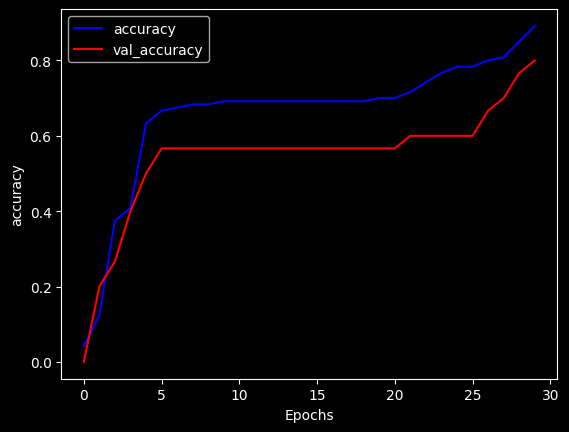

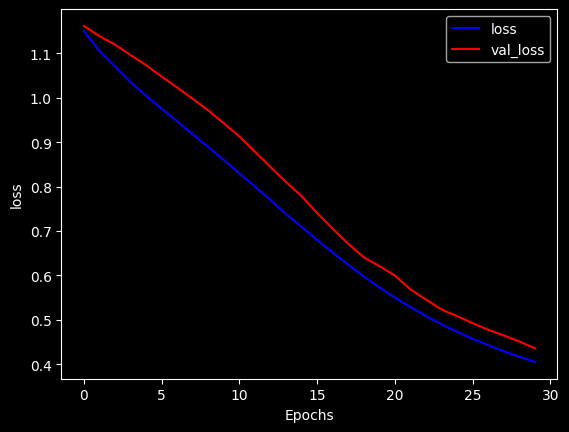

In [ ]:
# Función para graficar
def plot_graphs(history, string):
  plt.plot(history.history[string], color='blue')
  plt.plot(history.history['val_'+string], color='red')
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()

# Graficar curvas de loss y accuracy para datos de entrenamiento y validación
plot_graphs(history, 'accuracy')
plot_graphs(history, 'loss')

### 1.8.1.2 Métricas y matriz de confusión

In [ ]:
test_loss, test_acc = model_iris.evaluate(X_test,  y_test, verbose=2)
print('\nTest accuracy:', test_acc)

1/1 - 0s - loss: 0.4358 - accuracy: 0.8000 - 134ms/epoch - 134ms/step

Test accuracy: 0.800000011920929


In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score
# Obtener las predicciones del modelo
y_pred = model_iris.predict(X_test)
y_pred = np.argmax(y_pred, axis=1)

# Calcular los valores de precisión, recall y f1 score
precision = precision_score(y_test, y_pred, average='weighted', zero_division=True)
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

# Imprimir los resultados
print('Precision: {:.2f}'.format(precision))
print('Recall: {:.2f}'.format(recall))
print('F1 score: {:.2f}'.format(f1))


1/1 [==============================] - 0s 82ms/step
Precision: 0.90
Recall: 0.80
F1 score: 0.80


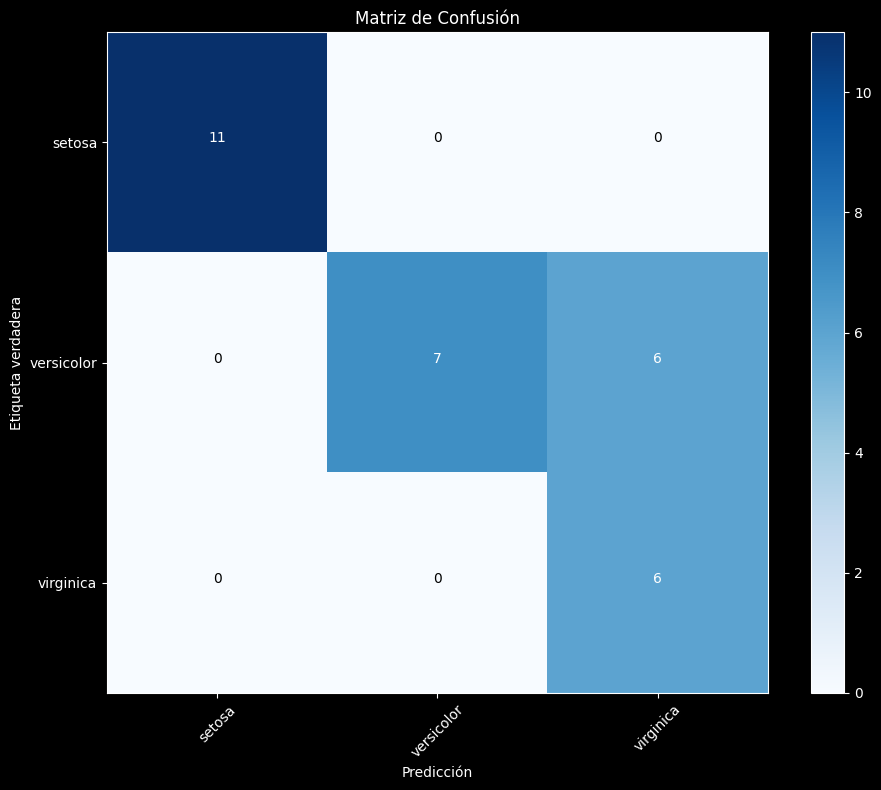

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import itertools
classes=['setosa', 'versicolor', 'virginica']
# Obtener los índices de la clase con mayor probabilidad de cada muestra

# Calcular la matriz de confusión
confusion_mtx = confusion_matrix(y_test, y_pred)

# Plotear la matriz de confusión
plt.figure(figsize=(10,8))
plt.imshow(confusion_mtx, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Matriz de Confusión')
plt.colorbar()
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes, rotation=45)
plt.yticks(tick_marks, classes)
plt.xlabel('Predicción')
plt.ylabel('Etiqueta verdadera')
thresh = confusion_mtx.max() / 2.
for i, j in itertools.product(range(confusion_mtx.shape[0]), range(confusion_mtx.shape[1])):
    plt.text(j, i, format(confusion_mtx[i, j], 'd'),
             horizontalalignment="center",
             color="white" if confusion_mtx[i, j] > thresh else "black")
plt.tight_layout()
plt.show()


## 1.9 Pruebas de predicción

In [ ]:
predictions = model_iris.predict(X_test)

1/1 [==============================] - 0s 21ms/step


In [ ]:
n_flor=3
clase=predictions[n_flor].argmax()
prob=str(predictions[n_flor].max())

class_names = ['setosa', 'versicolor', 'virginica']

print(f"Existe una confianza del {prob} de que esta flor corresponde a la clase: '{class_names[clase]}' y su etiqueta es: '{class_names[list(y_test)[n_flor]]}'")

Existe una confianza del 0.72533643 de que esta flor corresponde a la clase: 'virginica' y su etiqueta es: 'virginica'


# 2 Ejemplo Fashion mnist

## 2.1 Carga de dataset y definición de datos de entrenamiento y prueba

In [ ]:
# Dividimos en train y test
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

### Veamos shapes y grafiquemos datos!

In [ ]:
train_images.shape

(60000, 28, 28)

In [ ]:
train_labels.shape

(60000,)

In [ ]:
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

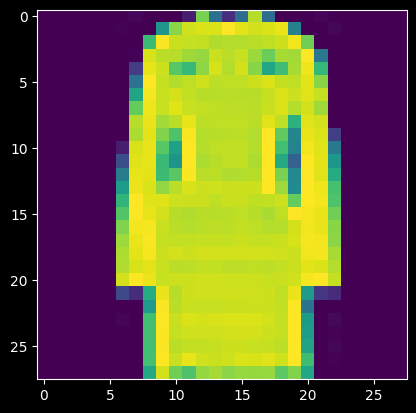

In [ ]:
plt.imshow(train_images[500]);

## 2.2 Escalar y preparar datos

In [ ]:
train_images = train_images.astype('float32') / 255
test_images = test_images.astype('float32') / 255

In [ ]:
train_images = train_images.reshape(train_images.shape[0],28, 28, 1) # el 1 es de un canal ya que estamos en escalda de grises, si fuera RGB seria 3.
test_images = test_images.reshape(test_images.shape[0], 28, 28, 1)

In [ ]:
train_labels_ohe = tf.keras.utils.to_categorical(train_labels, 10) # esta biblioteca sirve para poder estandarizar
test_labels = tf.keras.utils.to_categorical(test_labels, 10)

In [ ]:
train_labels_ohe.shape

(60000, 10)

In [ ]:
train_labels_ohe.shape

(60000, 10)

In [ ]:
train_labels_ohe

array([[0., 0., 0., ..., 0., 0., 1.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [ ]:
df_aux = pd.DataFrame(train_labels_ohe)
df_aux['label'] = train_labels
df_aux

,0,1,2,3,4,5,6,7,8,9,label
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,9
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,3
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...
59995,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,5
59996,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
59997,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,3
59998,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0


## 2.3 Definimos arquitectura, compilamos y entrenamos

In [ ]:
model_fmnist = tf.keras.models.Sequential([
    tf.keras.layers.Input(shape=(28, 28, 1)),
    # Definimos entrada de 28,28
    tf.keras.layers.Flatten(),
    # Densa de 64 neuronas
    tf.keras.layers.Dense(64, activation='relu'),
    # tf.keras.layers.Dense(32, activation='relu'),
    # tf.keras.layers.Dense(16, activation='relu'),
    # 3 Clases
    tf.keras.layers.Dense(10, activation='softmax')
])

In [ ]:
model_fmnist.summary()

Model: "sequential_19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_4 (Flatten)         (None, 784)               0         
                                                                 
 dense_42 (Dense)            (None, 64)                50240     
                                                                 
 dense_43 (Dense)            (None, 10)                650       
                                                                 
Total params: 50,890
Trainable params: 50,890
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model_fmnist.compile(loss='categorical_crossentropy', optimizer=Adam(lr=0.0001), metrics=['accuracy'])

/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


In [ ]:
history = model_fmnist.fit(train_images, train_labels_ohe,epochs = 15,
                    validation_data = (test_images, test_labels),
                    verbose = 1,
                    )


Epoch 1/15
1875/1875 [==============================] - 6s 3ms/step - loss: 0.7622 - accuracy: 0.7563 - val_loss: 0.5787 - val_accuracy: 0.8018
Epoch 2/15
1875/1875 [==============================] - 6s 3ms/step - loss: 0.5129 - accuracy: 0.8270 - val_loss: 0.5112 - val_accuracy: 0.8238
Epoch 3/15
1875/1875 [==============================] - 5s 2ms/step - loss: 0.4634 - accuracy: 0.8415 - val_loss: 0.4760 - val_accuracy: 0.8333
Epoch 4/15
1875/1875 [==============================] - 5s 3ms/step - loss: 0.4365 - accuracy: 0.8503 - val_loss: 0.4583 - val_accuracy: 0.8387
Epoch 5/15
1875/1875 [==============================] - 5s 2ms/step - loss: 0.4165 - accuracy: 0.8557 - val_loss: 0.4409 - val_accuracy: 0.8435
Epoch 6/15
1875/1875 [==============================] - 5s 3ms/step - loss: 0.4028 - accuracy: 0.8611 - val_loss: 0.4316 - val_accuracy: 0.8465
Epoch 7/15
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3918 - accuracy: 0.8643 - val_loss: 0.4259 - val_accuracy:

## 2.4 Gráficos y métricas

### 2.4.1 Curvas de entrenamiento

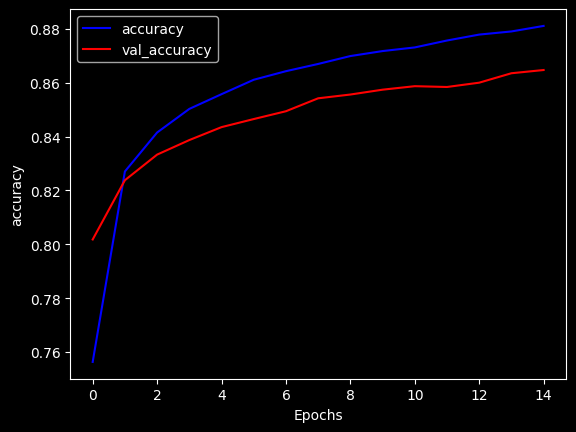

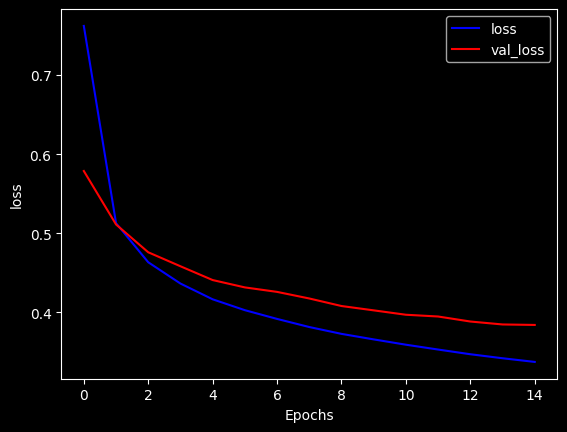

In [ ]:
# Función para graficar
def plot_graphs(history, string):
  plt.plot(history.history[string], color='blue')
  plt.plot(history.history['val_'+string], color='red')
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()

# Graficar curvas de loss y accuracy para datos de entrenamiento y validación
plot_graphs(history, 'accuracy')
plot_graphs(history, 'loss')

### 2.4.2 Evaluamos

In [ ]:
test_loss, test_acc = model_fmnist.evaluate(test_images,  test_labels, verbose=2)
print('\nTest accuracy:', test_acc)


313/313 - 0s - loss: 0.3841 - accuracy: 0.8647 - 434ms/epoch - 1ms/step

Test accuracy: 0.8647000193595886


## 2.5 Pruebas de predicción

In [ ]:
predictions = model_fmnist.predict(test_images)

313/313 [==============================] - 1s 1ms/step


Existe una confianza del 0.9937242 de que esta imagen corresponde a la clase: "Bag"


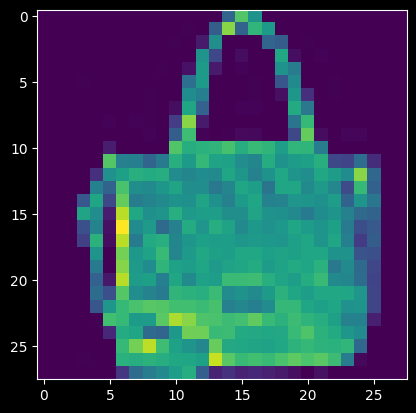

In [ ]:
n_imagen=2000
clase=predictions[n_imagen].argmax()
prob=str(predictions[n_imagen].max())

class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

print('Existe una confianza del ' + prob + ' de que esta imagen corresponde a la clase: "' + class_names[clase]+'"')
plt.imshow(test_images[n_imagen].reshape(28, 28))
plt.show()

# Tarea



*   Replicar y obtener mejores metricas
*   Graficar curvas de accuracy y loss



# Links!!!

Optimizadores en TF:

Adadelta: Optimizer that implements the Adadelta algorithm.

Adagrad: Optimizer that implements the Adagrad algorithm.

**Adam: Optimizer that implements the Adam algorithm.**

Adamax: Optimizer that implements the Adamax algorithm.

Ftrl: Optimizer that implements the FTRL algorithm.

Nadam: Optimizer that implements the NAdam algorithm.

Optimizer: Base class for Keras optimizers.

**RMSprop: Optimizer that implements the RMSprop algorithm.**

SGD: Gradient descent (with momentum) optimizer.*texto en cursiva*

https://www.tensorflow.org/api_docs/python/tf/optimizers

Losses:

BinaryCrossentropy: Computes the cross-entropy loss between true labels and predicted labels.

BinaryFocalCrossentropy: Computes the focal cross-entropy loss between true labels and predictions.

CategoricalCrossentropy: Computes the crossentropy loss between the labels and predictions.

CategoricalHinge: Computes the categorical hinge loss between y_true and y_pred.

CosineSimilarity: Computes the cosine similarity between labels and predictions.

Hinge: Computes the hinge loss between y_true and y_pred.

Huber: Computes the Huber loss between y_true and y_pred.

KLDivergence: Computes Kullback-Leibler divergence loss between y_true and y_pred.

LogCosh: Computes the logarithm of the hyperbolic cosine of the prediction error.

Loss: Loss base class.

MeanAbsoluteError: Computes the mean of absolute difference between labels and predictions.

MeanAbsolutePercentageError: Computes the mean absolute percentage error between y_true and y_pred.

MeanSquaredError: Computes the mean of squares of errors between labels and predictions.

MeanSquaredLogarithmicError: Computes the mean squared logarithmic error between y_true and y_pred.

Poisson: Computes the Poisson loss between y_true and y_pred.

Reduction: Types of loss reduction.

SparseCategoricalCrossentropy: Computes the crossentropy loss between the labels and predictions.

SquaredHinge: Computes the squared hinge loss between y_true and y_pred.

https://www.tensorflow.org/api_docs/python/tf/keras/losses

- Documentación oficial del modelo secuencial de Keras: https://www.tensorflow.org/guide/keras/sequential_model?hl=es-419
- Explicación general de la API de Keras: https://www.tensorflow.org/guide/keras/functional?hl=es-419
- Curso oficial de conceptos básicos en TensorFlow: https://www.tensorflow.org/resources/learn-ml/basics-of-machine-learning?hl=es-419
